In [1]:
! nvidia-smi

Mon Dec 11 13:56:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://github.com/amirtha19/Hacktech.git

Cloning into 'Hacktech'...
remote: Enumerating objects: 257, done.
remote: Counting objects: 100% (257/257), done.
remote: Compressing objects: 100% (209/209), done.
remote: Total 257 (delta 73), reused 202 (delta 40), pack-reused 0
Receiving objects: 100% (257/257), 6.73 MiB | 13.54 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [3]:
%cd /content/Hacktech/Speed_estimation

/content/Hacktech/Speed_estimation


In [4]:
!pip install ultralytics==8.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.5/247.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.7 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=a5a5a7ef5a9d80803d48f9bbe44bae2ea8fa6c8fd02c04e48e0834860a6c63ff
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [5]:
!pip install -r requirements.txt

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from google.colab.patches import cv2_imshow

In [7]:
from IPython import display
display.clear_output()

In [8]:
%cd /content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect

/content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect


In [9]:
!gdown "https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t
To: /content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/deep_sort_pytorch.zip
100% 43.1M/43.1M [00:00<00:00, 75.3MB/s]


In [10]:
!unzip /content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/deep_sort_pytorch.zip

Archive:  /content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/deep_sort_pytorch.zip
  inflating: deep_sort_pytorch/.gitignore  
   creating: deep_sort_pytorch/configs/
  inflating: deep_sort_pytorch/configs/deep_sort.yaml  
   creating: deep_sort_pytorch/deep_sort/
  inflating: deep_sort_pytorch/deep_sort/__init__.py  
   creating: deep_sort_pytorch/deep_sort/__pycache__/
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-38.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-38.pyc  
   creating: deep_sort_pytorch/deep_sort/deep/
 extracting: deep_sort_pytorch/deep_sort/deep/__init__.py  
   creating: deep_sort_pytorc

In [11]:
classes={'car': 0, 'van': 1, 'others': 2, 'bus': 3}
classs_id={b:a for (a,b) in classes.items()}

In [12]:
!mkdir -p dataset/train/images
!mkdir -p dataset/train/labels

In [13]:
!mkdir -p dataset/train/images

In [14]:
!mkdir -p dataset/valid/images
!mkdir -p dataset/valid/labels

In [15]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Make sure to upload this in your Hacktech folder in gdrive: https://drive.google.com/drive/u/1/folders/1X-gCnYc2KJ_txs4xfAnXln13xi_CZYwM This contains the detrac train data.

In [16]:
def chfname(namee):
    num=int(namee[13:])
    num=num+1
    return str(namee[:13])+f"{num:05d}"

In [17]:
from PIL import Image
# Open the image
image_path = "/content/gdrive/MyDrive/Hacktech/DETRAC-train-data/Insight-MVT_Annotation_Train/MVI_20011/img00001.jpg"
img = Image.open(image_path)
# Get the width and height
img_width, img_height = img.size
print(f"Image width: {img_width}, Image height: {img_height}")

Image width: 960, Image height: 540


In [18]:
def process_xml_file(xml_file, output_directory):
    if os.path.exists(xml_file):
        # Parse the target XML file
        tree = ET.parse(xml_file)
        root = tree.getroot()
        sequence_name = root.attrib['name']
        # Create a target directory for TXT files
        try:
            # Try creating the directory; ignore if it already exists
            os.makedirs(output_directory)
        except:
            pass
        # Change the current working directory to the target directory
        os.chdir(output_directory)
        # Initialize filename
        filename = str(sequence_name)+"_"+'img00001'
        for frame in root.findall('frame'):
            # Open a text file for writing
            with open(f"{filename}.txt", "w") as f:
                # Iterate through targets in the frame
                for target in frame.findall('target_list/target'):
                    clasas = classes[target.find('attribute').attrib['vehicle_type']]
                    box = target.find('box')
                    left = float(box.attrib['left'])
                    top = float(box.attrib['top'])
                    width = float(box.attrib['width'])
                    height = float(box.attrib['height'])
                    # Calculate xcen, ycen
                    xcen = (left + width / 2) / img_width
                    ycen = (top + height / 2) / img_height
                    norm_width = width / img_width
                    norm_height = height / img_height
                    # Write normalized target information to the file
                    content = f"{clasas} {xcen} {ycen} {norm_width} {norm_height}\n"
                    f.write(content)
            # Update filename for the next iteration
            filename = chfname(filename)
        # Change the current working directory back to the original directory
        os.chdir(origin)
    else:
        print(f"The specified XML file '{xml_file}' does not exist.")

In [19]:
# Define common variables
origin = os.getcwd()

In [20]:
def copy_and_rename_file(source_path, destination_path, new_filename):
    try:
        # Copy the file
        shutil.copy(source_path, destination_path)

        # Create the new file path with the desired filename
        new_file_path = f"{destination_path}/{new_filename}"

        # Rename the copied file
        shutil.move(f"{destination_path}/{source_path.split('/')[-1]}", new_file_path)

    except Exception as e:
        print(f"An error occurred: {e}")

In [21]:
xml_file_source="/content/gdrive/MyDrive/Hacktech/DETRAC-Train-Annotations-XML/DETRAC-Train-Annotations-XML"
train_image_source='/content/gdrive/MyDrive/Hacktech/DETRAC-train-data/Insight-MVT_Annotation_Train'
def preprocess(lis,label_path,image_path):
  for i in lis:
    process_xml_file(os.path.join(xml_file_source,str(i)+'.xml'),label_path)
    for j in os.listdir(os.path.join(train_image_source,i)):
       copy_and_rename_file(os.path.join(train_image_source,i,j),image_path,str(i)+"_"+str(j))

In [24]:
train = ["MVI_20011","MVI_20012","MVI_63562","MVI_63561","MVI_63561","MVI_63554","MVI_41073","MVI_41063","MVI_39861","MVI_39781","MVI_40192","MVI_40191","MVI_39811","MVI_20034","MVI_63521","MVI_63554","MVI_63562","MVI_41063"]
valid = ["MVI_20052","MVI_20033","MVI_20034","MVI_20063","MVI_39781","MVI_40751","MVI_63521","MVI_40211","MVI_20035","MVI_41073"]
E = "/content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/dataset/train/images"
lab ="/content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/dataset/train/labels"
vE = "/content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/dataset/valid/images"
vlab ="/content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/dataset/valid/labels"

In [25]:
preprocess(train,lab,E)
preprocess(valid,vlab,vE)

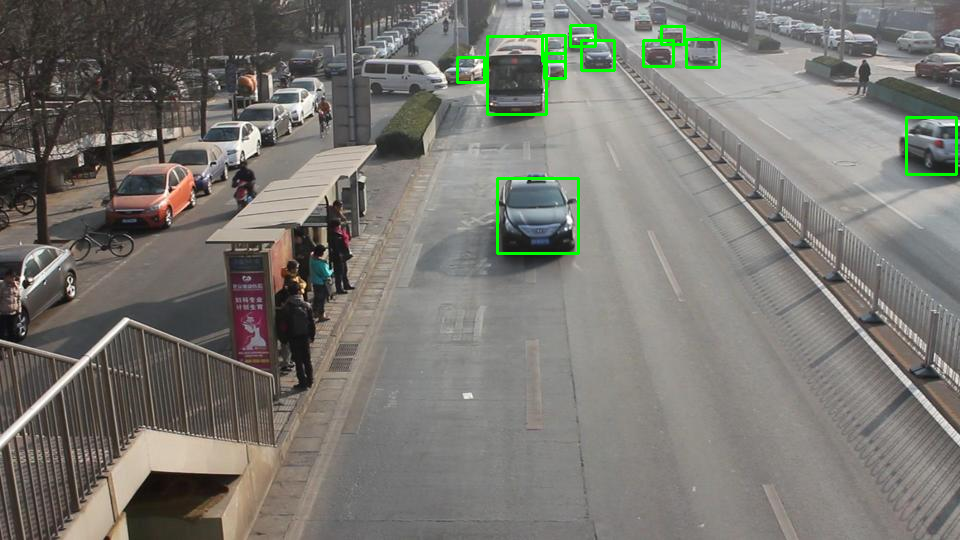

In [26]:
def show_images(image_path,label_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    # label_folder = "/content/dataset/train/labels"
    # label_filename = os.path.splitext(os.path.basename(image_path))[0] + ".xml"
    # label_path = os.path.join(label_folder, label_filename)

    # Read bounding box coordinates from the text file
    with open(label_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            xcen, ycen, norm_width, norm_height = map(float, parts[1:])

            # Calculate bounding box coordinates
            left = int((xcen - norm_width / 2) * image.shape[1])
            top = int((ycen - norm_height / 2) * image.shape[0])
            right = int((xcen + norm_width / 2) * image.shape[1])
            bottom = int((ycen + norm_height / 2) * image.shape[0])

            # Draw bounding box on the image
            color = (0, 255, 0)  # Green color
            thickness = 2
            cv2.rectangle(image, (left, top), (right, bottom), color, thickness)

    # Save the image with bounding boxes
    output_path = "/content/output_image.jpg"
    cv2.imwrite(output_path, image)

    # Display the image using Google Colab's cv2_imshow
    cv2_imshow(image)

# Example usage
image_folder = "/content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/dataset/train/images"
image_path='/content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/dataset/train/images/MVI_20011_img00642.jpg'

label_folder = "/content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/dataset/train/labels"
# label_filename = os.path.splitext(os.path.basename(image_path))[0] + ".xml"
# label_path = os.path.join(label_folder, label_filename)
label_path='/content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/dataset/train/labels/MVI_20011_img00642.txt'

show_images(image_path, label_path)

In [27]:
!cp /content/gdrive/MyDrive/Hacktech/data.yaml /content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/dataset

In [28]:
!cp /content/gdrive/MyDrive/Hacktech/scene1_01.mp4 /content/Hacktech/Speed_estimation/ultralytics/yolo/v8

In [ ]:
!python /content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/train.py data=/content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/dataset/data.yaml epochs=25

In [30]:
!cp /content/Hacktech/runs/detect/train/weights/best.pt /content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/

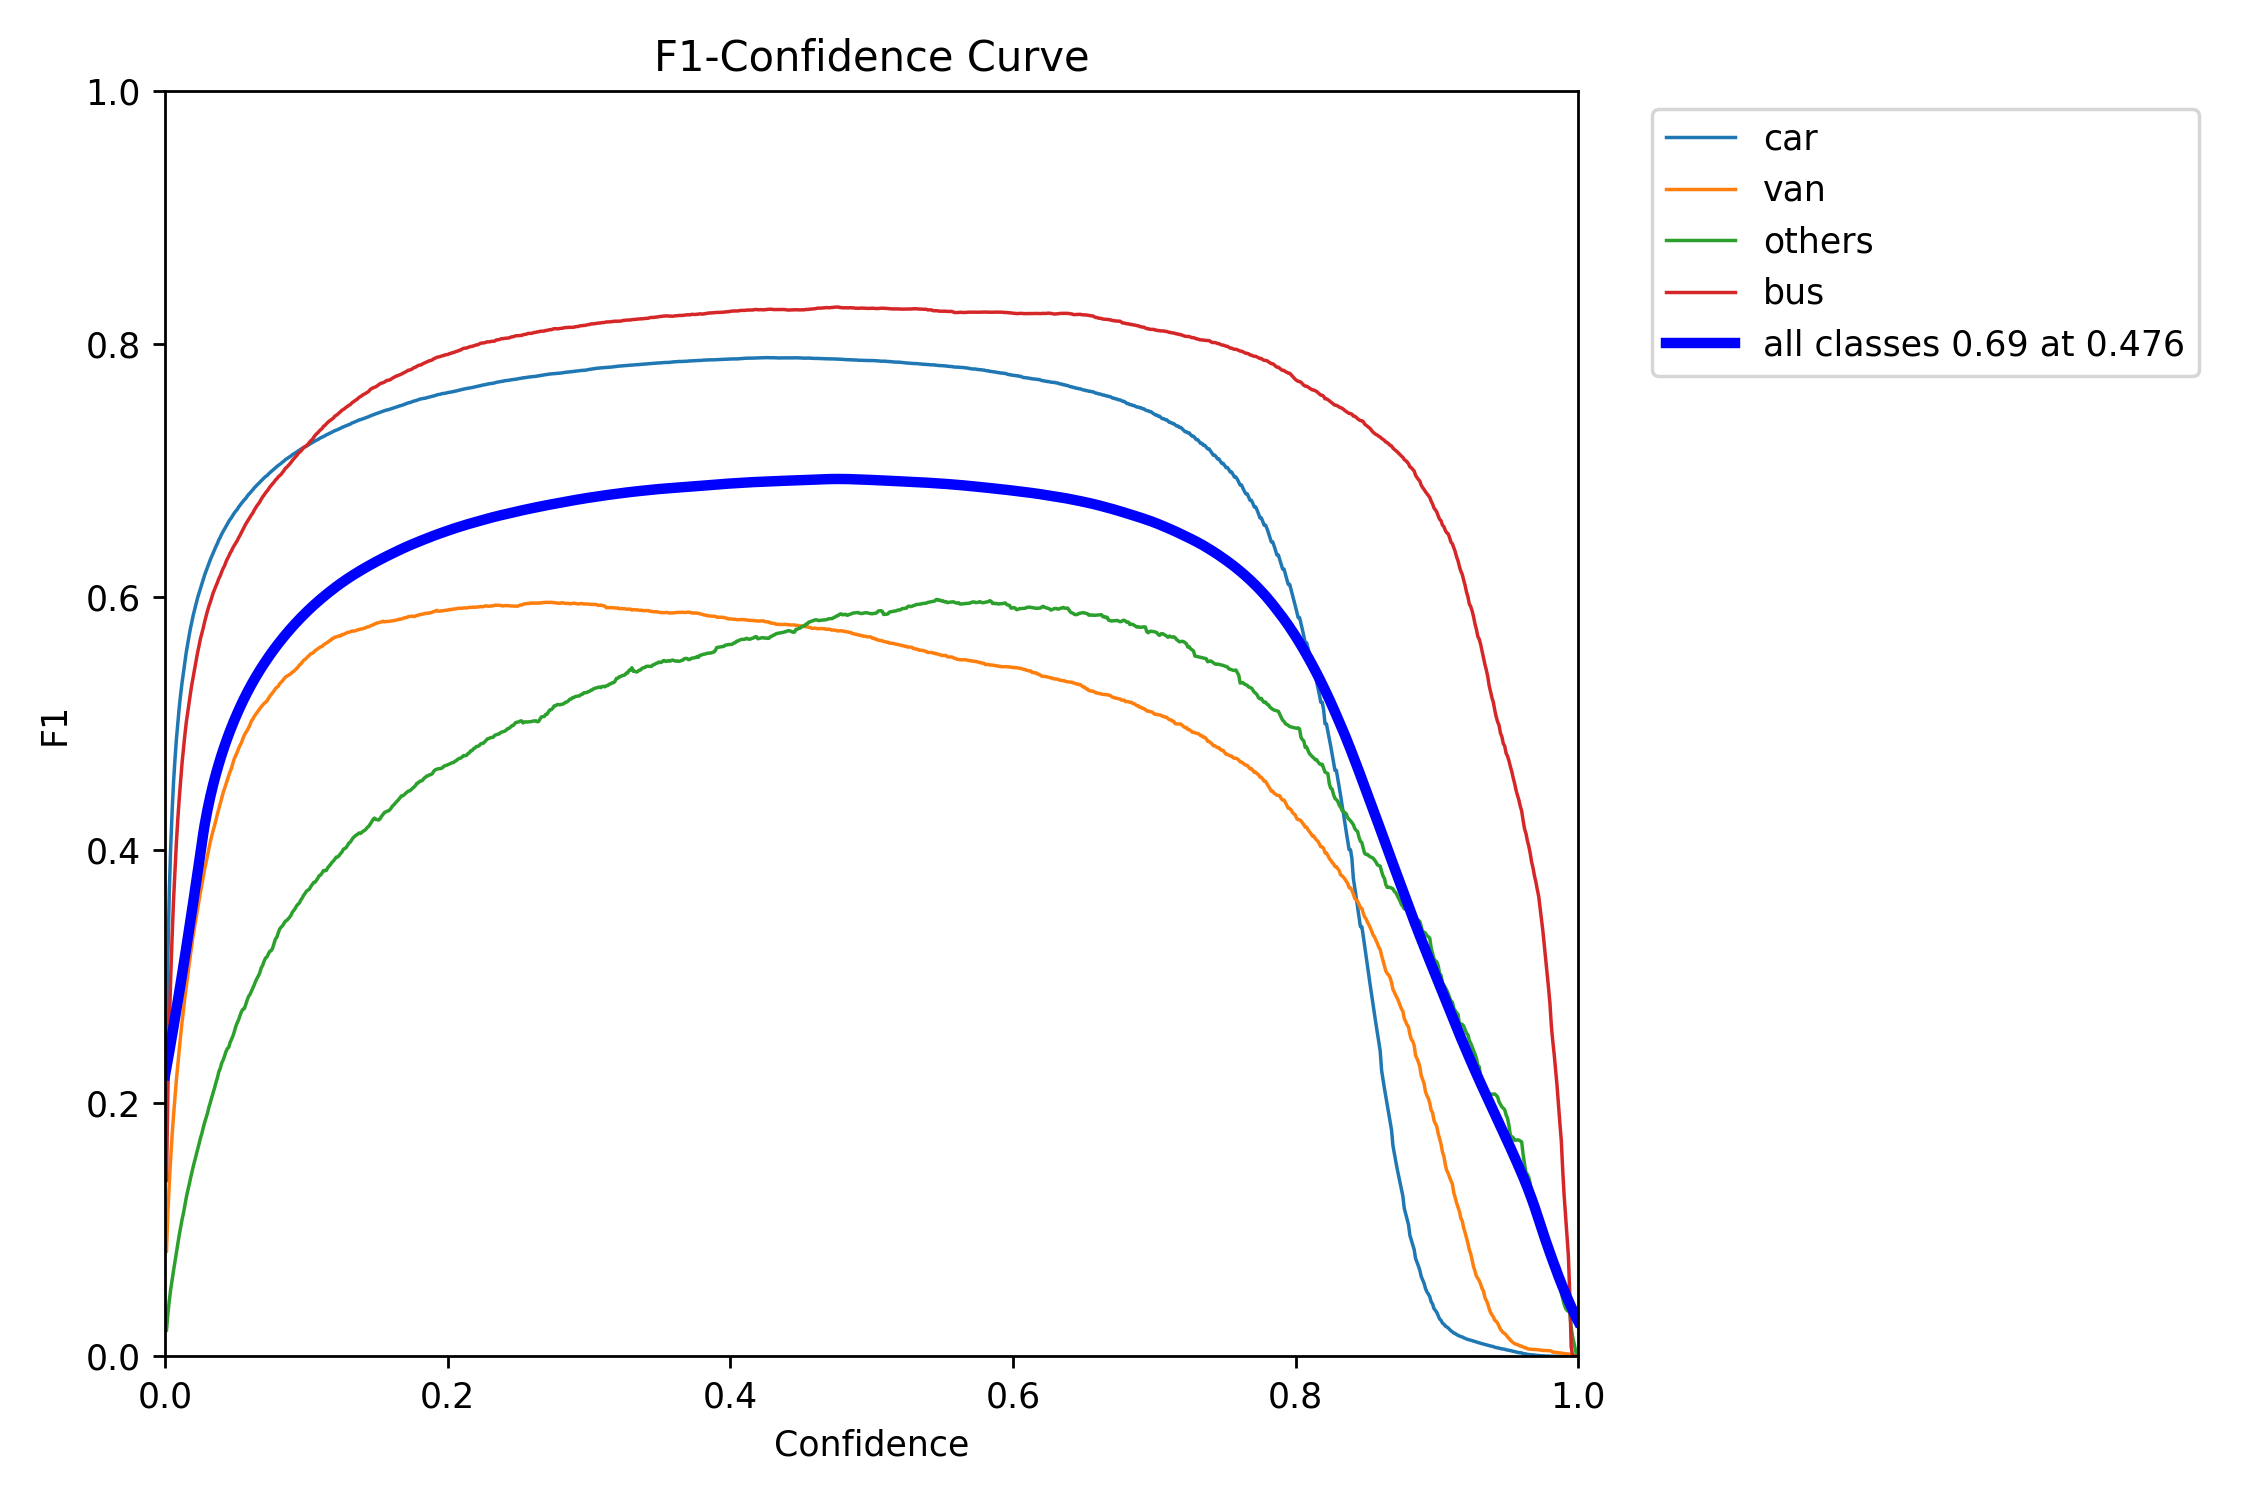

In [37]:
from IPython.display import Image
image_path = "/content/Hacktech/runs/detect/train/F1_curve.png"
Image(filename=image_path)


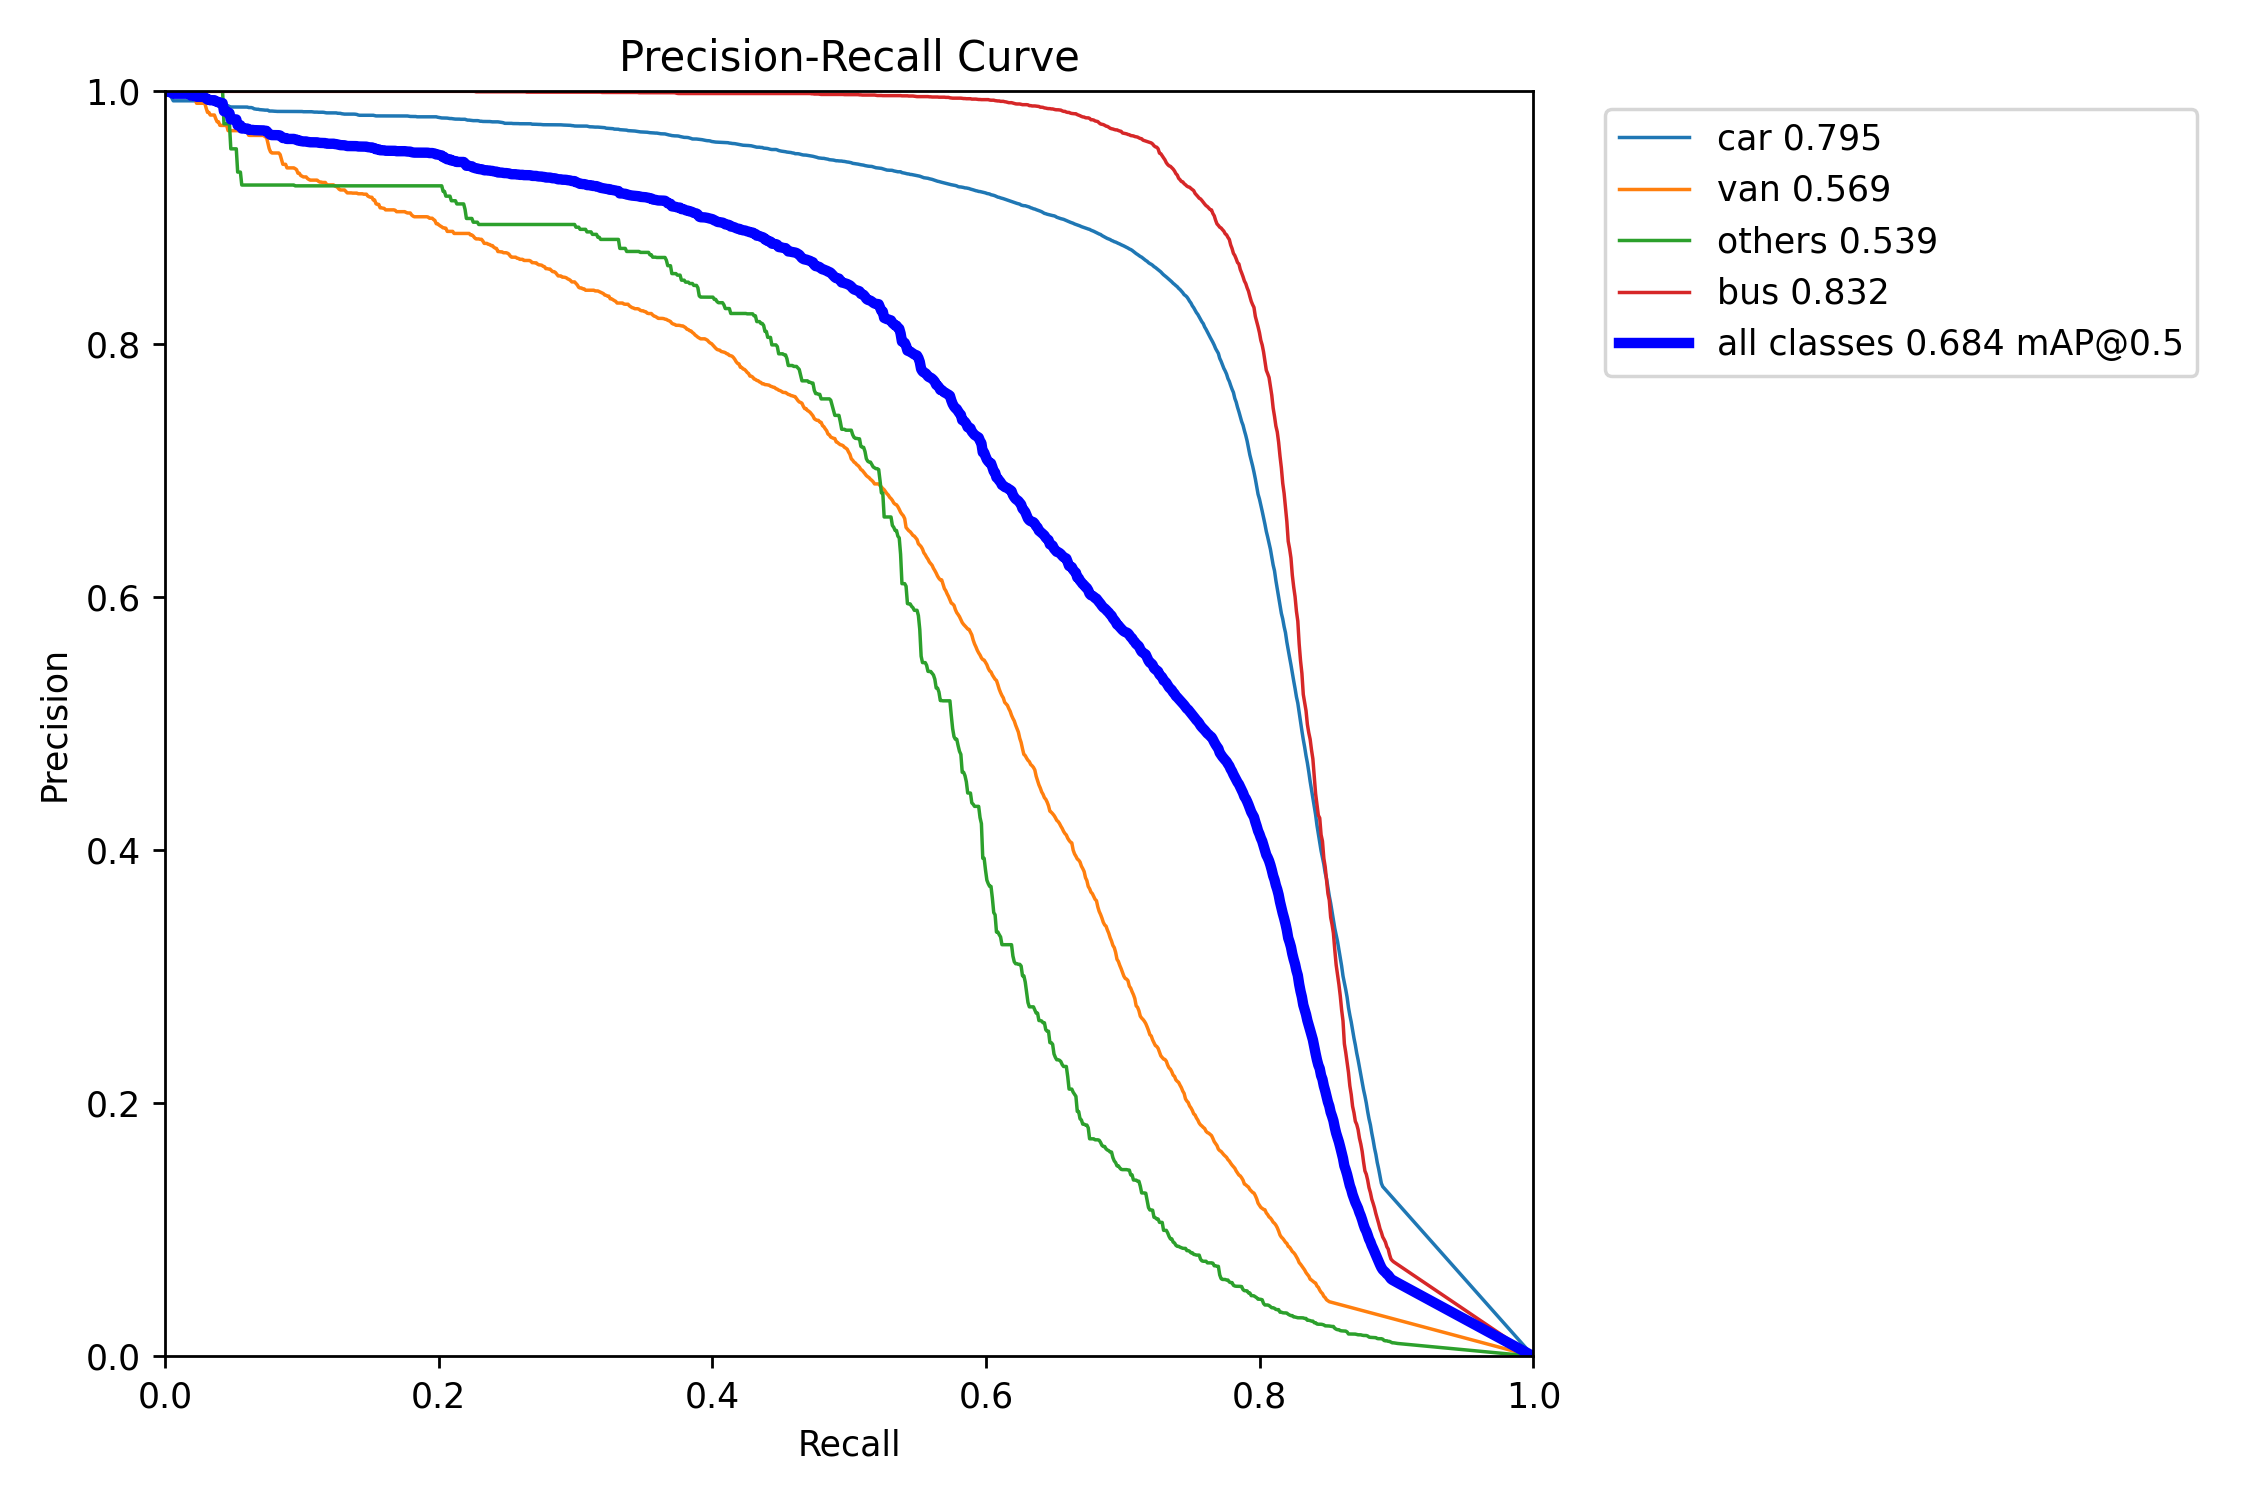

In [38]:
Image(filename="/content/Hacktech/runs/detect/train/PR_curve.png")

Refer /content/Hacktech/runs/detect/train for results and graphs

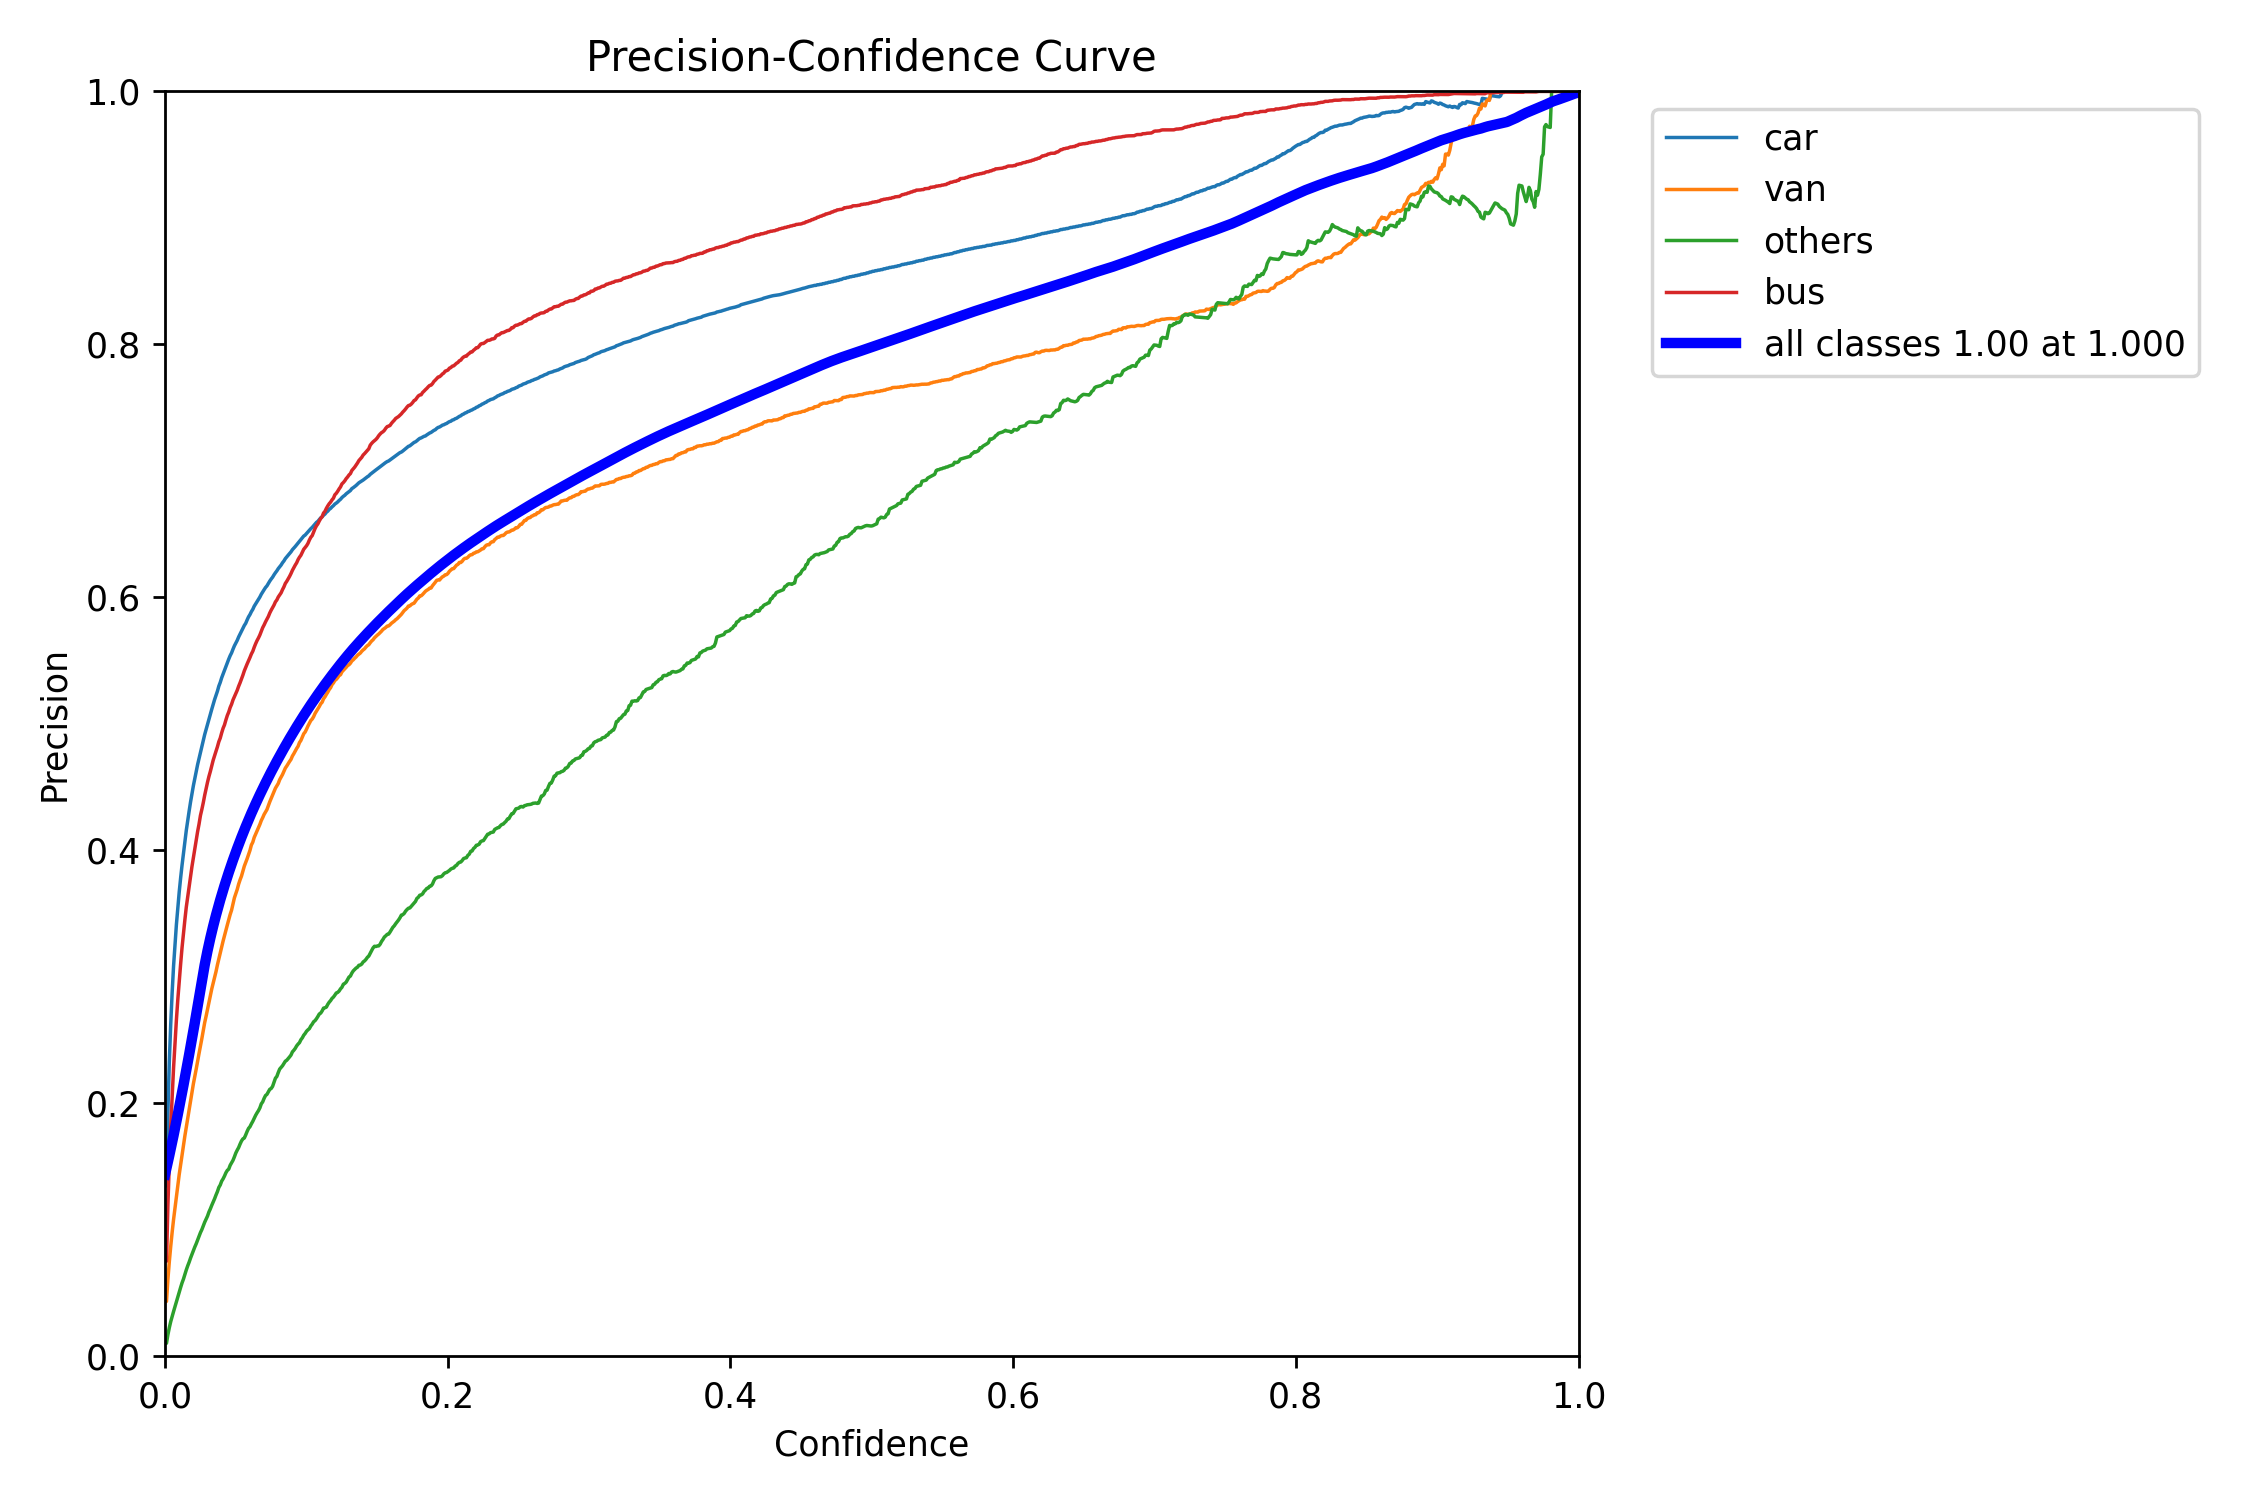

In [39]:
Image(filename="/content/Hacktech/runs/detect/train/P_curve.png")

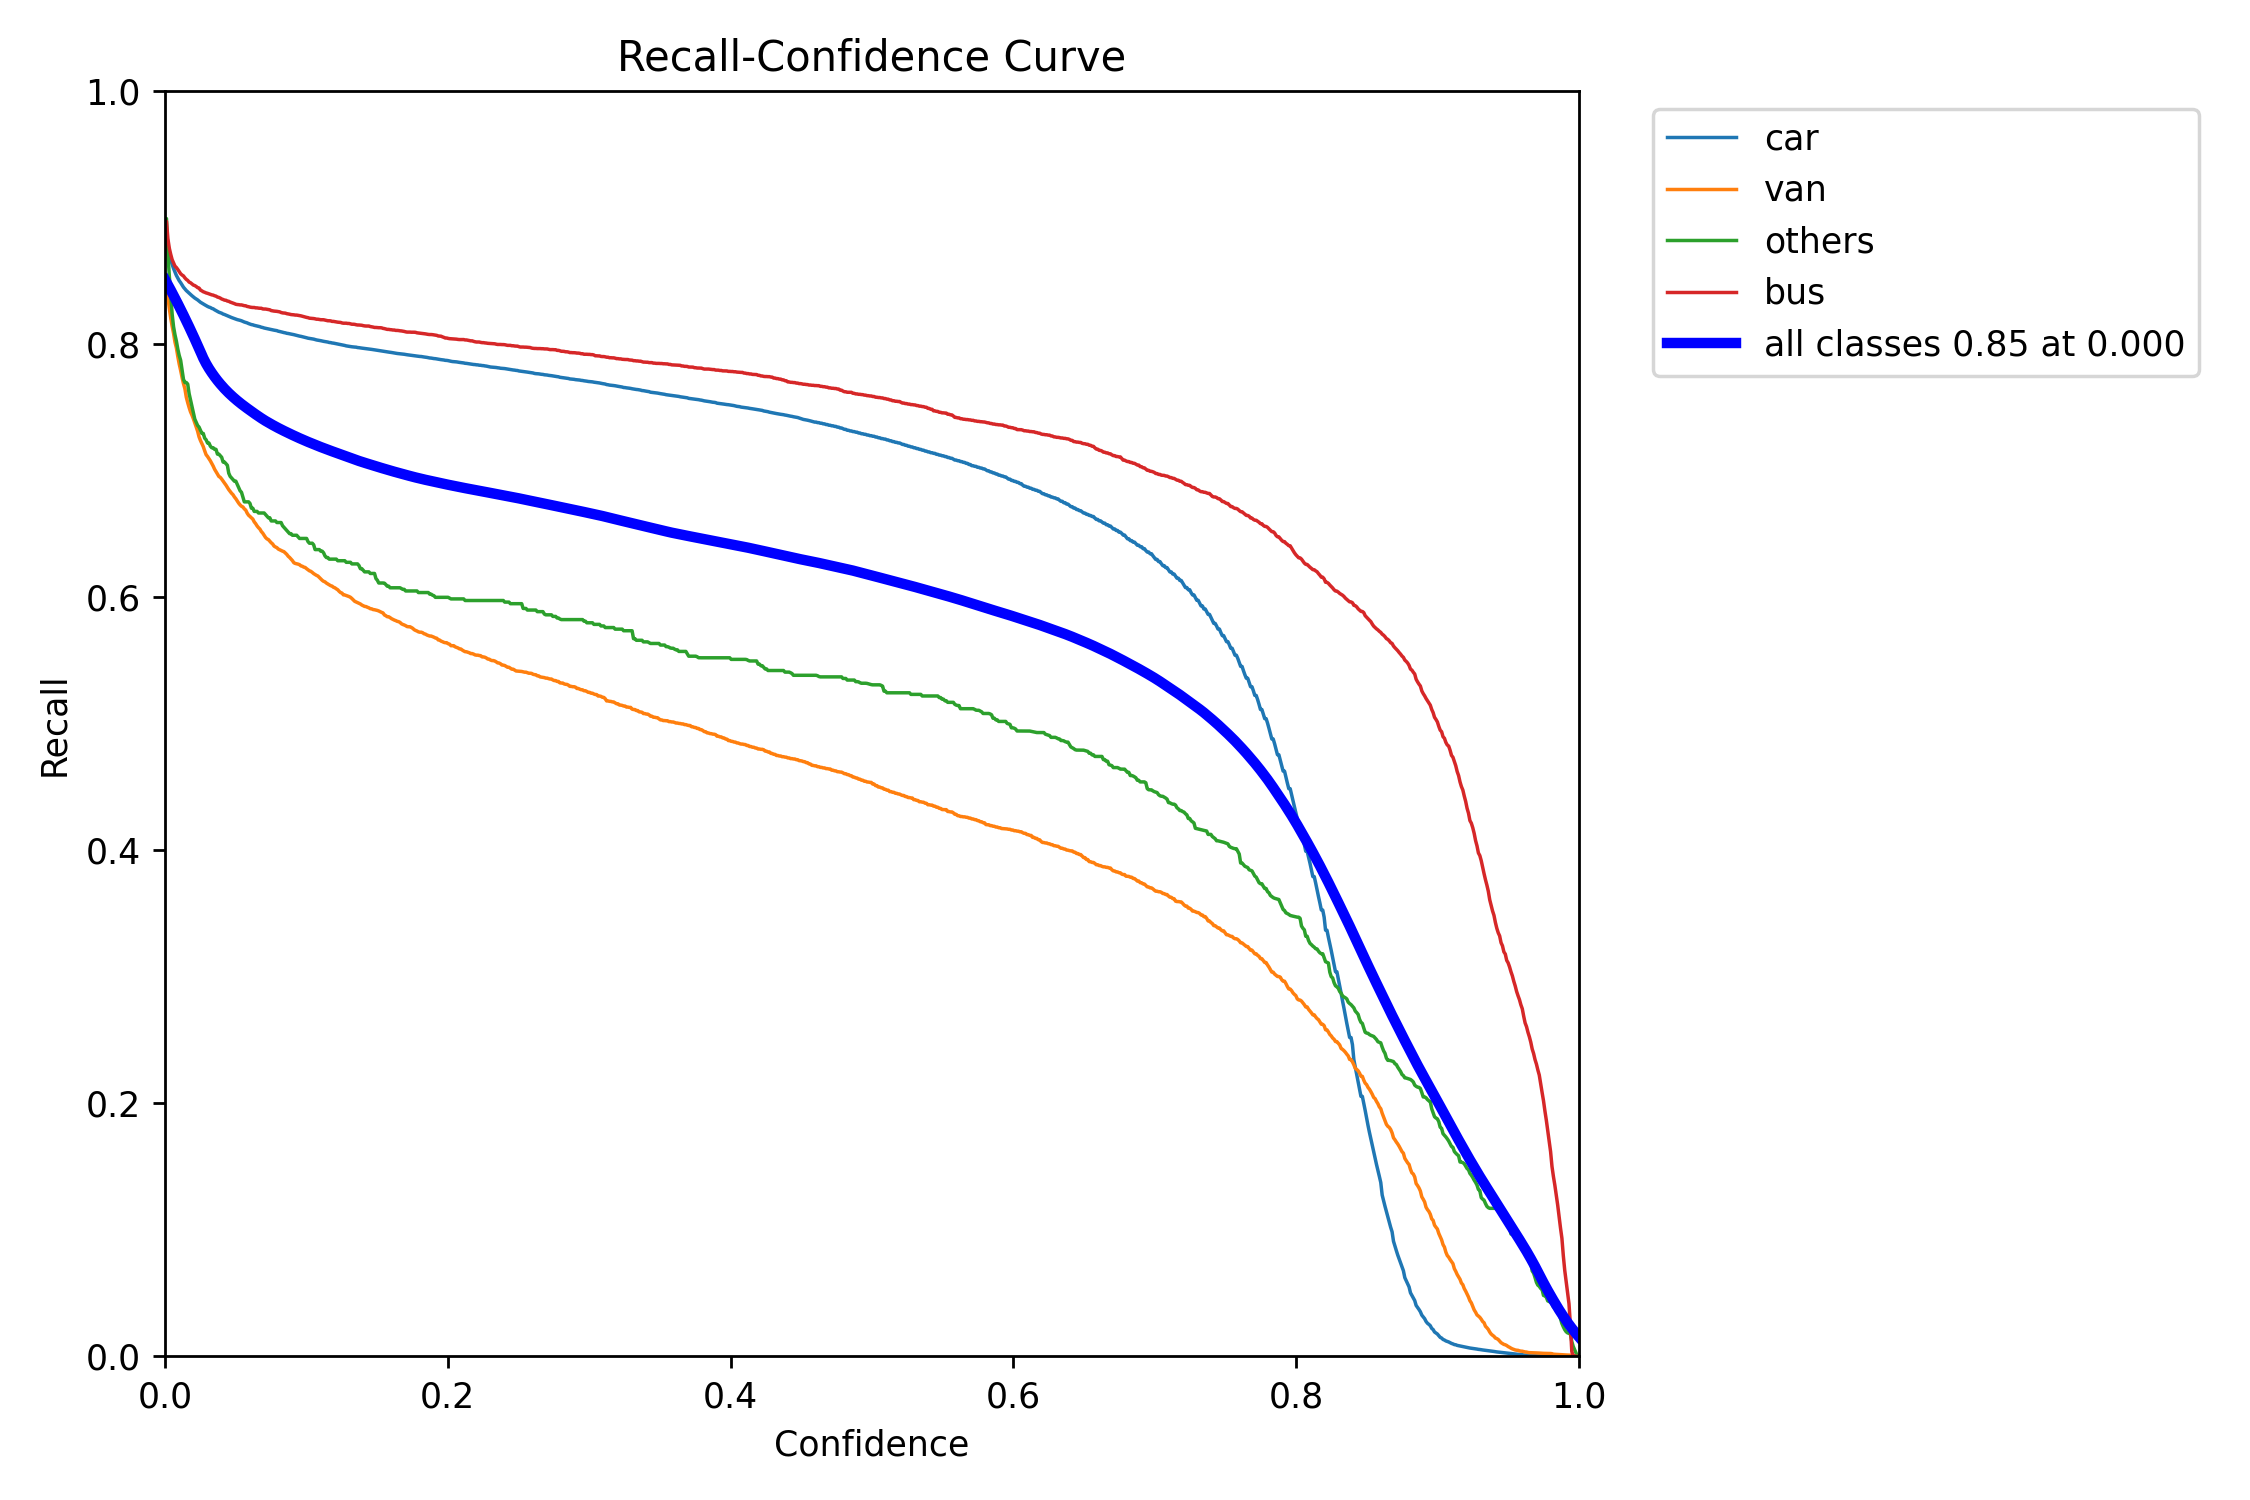

In [40]:
Image(filename="/content/Hacktech/runs/detect/train/R_curve.png")

In [31]:
!cd /content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect

In [ ]:
!python /content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/predictown.py model=/content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect/best.pt source=/content/gdrive/MyDrive/Testdatasets/scene2_05.mp4 save_txt=True save=True

In [33]:
os.getcwd()

'/content/Hacktech/Speed_estimation/ultralytics/yolo/v8/detect'

In [35]:
def sort_filenames_by_number(filenames):
    def extract_number(filename):
        # Extract the numeric part from the filename
        return int(filename.split("_")[-1].split(".")[0])

    # Sort the filenames using the extract_number function as the key
    sorted_filenames = sorted(filenames, key=extract_number)

    return sorted_filenames

# Example usage
pat = '/content/Hacktech/runs/detect/train2/labels'
filenames = os.listdir(pat)

sorted_files = sort_filenames_by_number(filenames)
# print(sorted_files)

In [36]:
import re
import os
tt=[]
num=1
for i in  sorted_files:
  p=os.path.join(pat,i)
  with open(p,'r') as r:
    for item in r:
      xx=[ x for x in item.split()]
      # print(item,len(xx),p)
      xmin = xx[1]
      xmax = xx[3]
      ymin = xx[2]
      ymax = xx[4]
      if len(item.split()) <=5:
        tt.append([num,item[0],xmin,xmax,ymin,ymax,int('0')])
      else:
        tt.append([num,item[0],xmin,xmax,ymin,ymax,int(item.split()[-1])])
    num+=1

Please give your videopath and text file name here

In [ ]:
vidpath='/content/gdrive/MyDrive/Testdatasets/scene2_05.mp4'
vidname=(os.path.basename(vidpath)).split('.')[0]
ft=open("/content/scene2_05.txt","w")
for i in tt:
  try:
    ft.write(str(vidname)+" "+str((i)[0])+" "+" ".join([str(x) for x in i[1:-1]])+" "+str((i)[-1])+"\n")
  except:
        ft.write('0000000')

The video will be present inside last train in runs

You can get the output in /content/scene1_01.txt